## ニューラルネットワーク

In [33]:
import pandas as pd
df = pd.read_csv('../wine+quality/winequality-white.csv', delimiter=';')
X0 = df.drop(columns=['quality'])
y0 = df['quality']

X = X0.values
print(X.shape)
y = y0.values.reshape(-1, 1)
print(y.shape)

(4898, 11)
(4898, 1)


In [34]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#標準化
scaler = preprocessing.StandardScaler()
#print(X)
scaler.fit(X)
s_x = scaler.transform(X) 
#print(s_x)
scaler.fit(y)
s_y = scaler.transform(y)

X_train, X_test, y_train, y_test = train_test_split(s_x, s_y, test_size=0.2, random_state=1)

In [35]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):   
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
hidden_size = 100
output_size = y_train.shape[1]
model = MLP(input_size, hidden_size, output_size)

In [36]:
# PyTorchテンソルに変換
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# データローダーの作成
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [37]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [38]:
num_epochs = 60

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.size())
        #print(targets.size())
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    if (epoch+1)%5 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Epoch 5/60, Loss: 0.5987
Epoch 10/60, Loss: 0.5479
Epoch 15/60, Loss: 0.5029
Epoch 20/60, Loss: 0.4624
Epoch 25/60, Loss: 0.4267
Epoch 30/60, Loss: 0.3961
Epoch 35/60, Loss: 0.3718
Epoch 40/60, Loss: 0.3517
Epoch 45/60, Loss: 0.3418
Epoch 50/60, Loss: 0.3048
Epoch 55/60, Loss: 0.2911
Epoch 60/60, Loss: 0.2813


In [39]:
model.eval()
total_loss = 0.0

pred_y =  model(X_test).detach().numpy()

#　元に戻す
r_pred = scaler.inverse_transform(pred_y)
r_test = scaler.inverse_transform(y_test)

print(mean_squared_error(r_test, r_pred))

0.47873344562537384


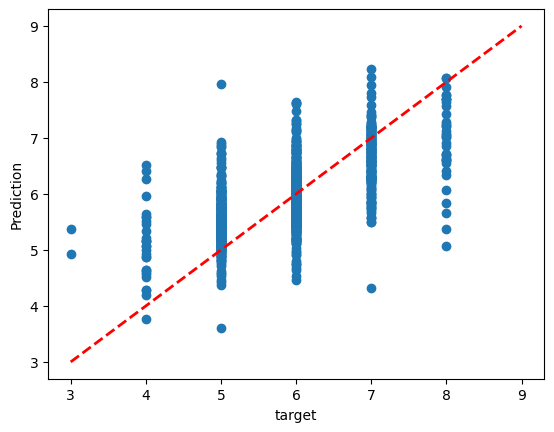

In [40]:
import matplotlib.pyplot as plt
#グラフ表示
plt.scatter(r_test, r_pred) #散布図
plt.xlabel('target')
plt.ylabel('Prediction')

# y=x の補助線を追加
max_val = 9
min_val = 3
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.show()